# Data Input

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

onefig_size = (10,4)
multifigs_size = (12,4)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data overview

Dataset includes 118934 observations on 26 variables:

* **ID:** Household ID
* **pid:** Respondent ID
* **MATINH:** Province code
* **Urban_Rural:** Urbanity
* **age:** Respondent age
* **gender:** Gender
* **job_dsecription:** Respondent's occupation
* **job_group:** Respondent's job group
* **SEQ:** so the reader knows the order of activity
* **BEGIN:** Begin time
* **END:** End time
* **Duration:** Duration
* **Q401:** Main activity
* **Q402:** Secondary activity
* **Q403:** Place
* **Q404:** Alone, company, together
* **int1:** With wife/husband
* **int2:** With parents
* **int3:** With HH members (Under 6 y.o)
* **int4:** With HH members (from 6 to 60 y.o)
* **int5:** With HH members (Above 60 y.o)
* **int6:** With Other (not HH members)
* **Q406A:** Earn money with main act.
* **Q406B:** Earn money with sec. act.
* **Q407A:** For whom main act.
* **Q407B:** For whom sec. act.




In [7]:
original_df = pd.read_csv('/content/drive/MyDrive/Bussiness-Intelligence/diary_main/4_diary_main.csv', encoding='latin-1')
original_df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B
0,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,18,1350,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,8,750,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,5.0,NaN
2,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,4,340,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,5.0,NaN
3,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,7,710,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
4,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,19,1370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118933 entries, 0 to 118932
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               118933 non-null  int64  
 1   pid              118933 non-null  int64  
 2   MATINH           118933 non-null  int64  
 3   Urban_Rural      118933 non-null  int64  
 4   age              118933 non-null  int64  
 5   gender           118933 non-null  int64  
 6   job_dsecription  118933 non-null  object 
 7   job_group        118933 non-null  int64  
 8   SEQ              118933 non-null  int64  
 9   BEGIN            118933 non-null  int64  
 10  END              118933 non-null  int64  
 11  Duration         118933 non-null  int64  
 12  Q401             118933 non-null  int64  
 13  Q402             30950 non-null   float64
 14  Q403             103613 non-null  float64
 15  Q404             103613 non-null  float64
 16  int1             10410 non-null   floa

Next, let's find out more information about the numerical variables in the below table:

In [9]:
original_df.describe()

,ID,pid,MATINH,Urban_Rural,age,gender,job_group,SEQ,BEGIN,END,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B
count,1.189330e+05,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,...,10410.0,2537.000000,8023.0,10011.000000,831.0,10178.000000,103613.000000,30943.000000,103613.000000,30943.000000
mean,5.029142e+14,2.539968,49.785964,1.625823,40.110802,1.688505,2.957321,11.187231,777.376254,850.034305,...,1.0,0.998423,1.0,0.999301,1.0,0.999116,0.124936,0.045859,1.070512,0.617587
std,2.833776e+14,1.265257,28.074580,0.483912,13.276015,0.463106,1.656020,7.035456,338.004077,368.111278,...,0.0,0.039684,0.0,0.026435,0.0,0.029725,0.330648,0.209182,1.569925,1.299825
min,1.001000e+13,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,240.000000,250.000000,...,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.130411e+14,2.000000,31.000000,1.000000,31.000000,1.000000,1.000000,5.000000,450.000000,520.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445419e+14,2.000000,44.000000,2.000000,39.000000,2.000000,2.000000,10.000000,750.000000,810.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.574226e+14,3.000000,75.000000,2.000000,51.000000,2.000000,5.000000,16.000000,1080.000000,1110.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,0.000000,0.000000,2.000000,0.000000
max,9.596132e+14,10.000000,95.000000,2.000000,64.000000,2.000000,5.000000,47.000000,1670.000000,1680.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,7.000000,7.000000


*   `age` has range from 18 to 64

# Prep | Cleaning data




1.   Clone a copy of the original dataset to keep it saparated.

In [11]:
df = original_df.copy()

## Data Duplication

We'll find whether the dataset has any duplication:

In [12]:
dup_ind = df.duplicated()
df[dup_ind]

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B


As you can see, I have no duplication record.


---




## Missing Data

Let's check the percent of missing data:

In [13]:
df.isnull().sum()*100/df.shape[0]

ID                  0.000000
pid                 0.000000
MATINH              0.000000
Urban_Rural         0.000000
age                 0.000000
gender              0.000000
job_dsecription     0.000000
job_group           0.000000
SEQ                 0.000000
BEGIN               0.000000
END                 0.000000
Duration            0.000000
Q401                0.000000
Q402               73.976945
Q403               12.881202
Q404               12.881202
int1               91.247173
int2               97.866866
int3               93.254185
int4               91.582656
int5               99.301287
int6               91.442241
Q406A              12.881202
Q406B              73.982831
Q407A              12.881202
Q407B              73.982831
dtype: float64

So there's we have 13 missing in the dataset, but I will not use it in this project, so I will drop it.


In [14]:
df = df.drop("Q402", axis=1)
df = df.drop("Q403", axis=1)
df = df.drop("Q404", axis=1)
df = df.drop("int1", axis=1)
df = df.drop("int2", axis=1)
df = df.drop("int3", axis=1)
df = df.drop("int4", axis=1)
df = df.drop("int5", axis=1)
df = df.drop("int6", axis=1)
df = df.drop("Q406A", axis=1)
df = df.drop("Q406B", axis=1)
df = df.drop("Q407A", axis=1)
df = df.drop("Q407B", axis=1)

In [15]:
df['age'] = df['age'].astype('object')
df['Urban_Rural'] = df['Urban_Rural'].astype('object')
df['MATINH'] = df['MATINH'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118933 entries, 0 to 118932
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               118933 non-null  int64 
 1   pid              118933 non-null  int64 
 2   MATINH           118933 non-null  object
 3   Urban_Rural      118933 non-null  object
 4   age              118933 non-null  object
 5   gender           118933 non-null  int64 
 6   job_dsecription  118933 non-null  object
 7   job_group        118933 non-null  int64 
 8   SEQ              118933 non-null  int64 
 9   BEGIN            118933 non-null  int64 
 10  END              118933 non-null  int64 
 11  Duration         118933 non-null  int64 
 12  Q401             118933 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 11.8+ MB


# Explore Data Analysis

The cleaned dataset has total 118934 observations in 13 columns, includeed:
* Catagory vaialbles: `job_dsecription`
* Numerical vaialbles: `ID`, `pid`, `MATINH`, `Urban_Rural`, `age`, `gender`, `job_group`, `SEQ`, `BEGIN`, `END`, `Duration`, `Q401`

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118933 entries, 0 to 118932
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               118933 non-null  int64 
 1   pid              118933 non-null  int64 
 2   MATINH           118933 non-null  object
 3   Urban_Rural      118933 non-null  object
 4   age              118933 non-null  object
 5   gender           118933 non-null  int64 
 6   job_dsecription  118933 non-null  object
 7   job_group        118933 non-null  int64 
 8   SEQ              118933 non-null  int64 
 9   BEGIN            118933 non-null  int64 
 10  END              118933 non-null  int64 
 11  Duration         118933 non-null  int64 
 12  Q401             118933 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 11.8+ MB


To visualize the numerical variables, we'll turn them into categorical variables.

First, for main active, accroding from [Vietnam Time-use Survey 2022 - Activity list](https://microdata.worldbank.org/index.php/catalog/5844/download/61837) , we'll consider `Main active` below:


In [17]:
def get_activity(row):
    # code = int(code)
    code = row['Q401']
    if code in [101, 102, 199, 201, 202, 299, 301, 302, 399, 401, 402, 499, 502]:
        return "Work"
    elif code in [198, 298, 298, 498, 598, 698, 798, 898, 998, 1098, 1198, 1298, 1398, 1498, 1598]:
        return "Travelling"
    elif code in [501]:
        return "Sell food"
    elif code in [504, 505, 506, 507, 508]:
        return "Provide services"
    elif code in [601]:
        return "Housework"
    elif code in [602]:
        return "Shopping"
    elif code in [701, 702]:
        return "Caring"
    elif code in [901, 902, 903]:
        return "Education"
    elif code in [1201, 1202, 1203, 1299]:
        return "Entertainment"
    elif code in [1301, 1302, 1399]:
        return "Sport"
    elif code == 1402:
        return "TV/Youtube"
    elif code == 1404:
        return "Surf web"
    elif code == 1501:
        return "Sleeping"
    elif code == 1502:
        return "Eating"
    elif code == 1503:
        return "Personal hygiene"
    elif code == 1506:
        return "Relaxing"
    else:
        return "Others"

df['Main active'] = df.apply(get_activity, axis=1)
df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,END,Duration,Q401,Main active
0,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,18,1350,1370,20,1503,Personal hygiene
1,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,8,750,900,150,101,Work
2,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,4,340,360,20,1598,Travelling
3,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,7,710,750,40,1502,Eating
4,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,19,1370,1680,310,1501,Sleeping


Secondly, for age, accroding from [Age Categories](https://www.statcan.gc.ca/en/concepts/definitions/age2), Life Cycle Groupings, we'll consider a `age_groups` below:

* Children: below 15
* Youth: from 15 - 24
* Adult: from 25 - 64
* Senior: above 64

In [18]:
def categorize_age(row):
  if row["age"] < 15:
    label = "children"
  elif row["age"] < 24:
    label = "youth"
  elif row["age"] < 64:
    label = "adult"
  else:
    label = "senior"
  return label

df['age_groups'] = df.apply(categorize_age, axis=1)
df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,END,Duration,Q401,Main active,age_groups
0,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,18,1350,1370,20,1503,Personal hygiene,adult
1,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,8,750,900,150,101,Work,adult
2,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,4,340,360,20,1598,Travelling,adult
3,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,7,710,750,40,1502,Eating,adult
4,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,19,1370,1680,310,1501,Sleeping,adult


Third, for MATINH, accroding from [MATINH Categories](https://microdata.worldbank.org/index.php/catalog/5844/variable/F3/V65?name=MATINH), we'll consider a `Provice` below:

In [19]:
def categorize_province(row):
  code = row["MATINH"]
  if code == 1:
    return 'Ha Noi'
  elif code ==10:
    return 'Lao Cai'
  elif code ==14:
    return "Son La"
  elif code ==15:
    return "Yen Bai"
  elif code ==17:
    return "Hoa Binh"
  elif code ==19:
    return "Thai Nguyen"
  elif code ==20:
    return 'Lang Son'
  elif code ==22:
    return 'Quang Ninh'
  elif code ==24:
    return 'Bac Giang'
  elif code ==25:
    return "Phu Tho"
  elif code ==31:
    return "Hai Phong"
  elif code ==33:
    return "Hung Yen"
  elif code ==35:
    return 'Ha Nam'
  elif code ==36:
    return 'Nam Dinh'
  elif code ==38:
    return 'Thanh Hoa'
  elif code ==40:
    return 'Nghe An'
  elif code ==42:
    return "Ha Tinh"
  elif code ==44:
    return "Quang Binh"
  elif code ==46:
    return "Hue"
  elif code ==48:
    return 'Da Nang'
  elif code ==52:
    return 'Binh Dinh'
  elif code ==56:
    return 'Khanh Hoa'
  elif code ==64:
    return "Gia Lai"
  elif code ==66:
    return "Dak Lak"
  elif code ==68:
    return "Lam Dong"
  elif code ==70:
    return 'Binh Phuoc'
  elif code ==72:
    return 'Tay Ninh'
  elif code ==74:
    return 'Binh Duong'
  elif code ==75:
    return 'Dong Nai'
  elif code ==77:
    return 'Vung Tau'
  elif code ==79:
    return "HCM"
  elif code ==80:
    return "Long An"
  elif code ==82:
    return "Tien Giang"
  elif code ==87:
    return 'Dong Thap'
  elif code ==89:
    return 'An Giang'
  elif code ==91:
    return 'Kien Giang'
  elif code ==92:
    return "Can Tho"
  elif code ==93:
    return "Hau Giang"
  elif code ==95:
    return 'Bac Lieu'

df['Province'] = df.apply(categorize_province, axis=1)
df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,END,Duration,Q401,Main active,age_groups,Province
0,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,18,1350,1370,20,1503,Personal hygiene,adult,Ha Noi
1,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,8,750,900,150,101,Work,adult,Ha Noi
2,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,4,340,360,20,1598,Travelling,adult,Ha Noi
3,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,7,710,750,40,1502,Eating,adult,Ha Noi
4,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,19,1370,1680,310,1501,Sleeping,adult,Ha Noi


In [20]:
def categorize_urban(row):
  if row["Urban_Rural"] ==1:
    label = "URBAN"
  else:
    label = "RURAL"
  return label

df['Urban_Rural_GR'] = df.apply(categorize_urban, axis=1)
df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,END,Duration,Q401,Main active,age_groups,Province,Urban_Rural_GR
0,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,18,1350,1370,20,1503,Personal hygiene,adult,Ha Noi,URBAN
1,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,8,750,900,150,101,Work,adult,Ha Noi,URBAN
2,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,4,340,360,20,1598,Travelling,adult,Ha Noi,URBAN
3,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,7,710,750,40,1502,Eating,adult,Ha Noi,URBAN
4,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,19,1370,1680,310,1501,Sleeping,adult,Ha Noi,URBAN


In [21]:
def categorize_gen(row):
  if row["gender"] ==1:
    label = "male"
  else:
    label = "female"
  return label

df['sex'] = df.apply(categorize_gen, axis=1)
df.head(2)

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,END,Duration,Q401,Main active,age_groups,Province,Urban_Rural_GR,sex
0,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,18,1350,1370,20,1503,Personal hygiene,adult,Ha Noi,URBAN,female
1,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,8,750,900,150,101,Work,adult,Ha Noi,URBAN,female


## Predict Variable

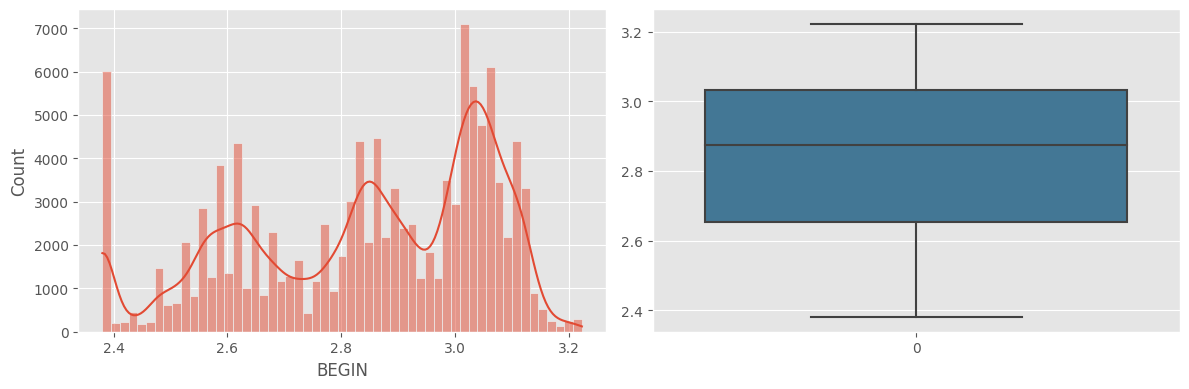

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(np.log10(df['BEGIN']), kde = True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(np.log10(df['BEGIN']), ax=axs[1], palette='mako')
plt.tight_layout()

As we can see, we can assume that there's no outliers in this dataset.

Next, let's analyze the categorical variables.

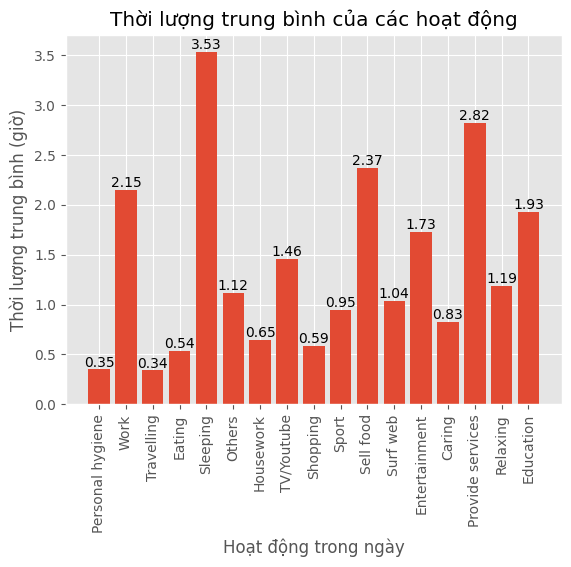

In [23]:
activities = df["Main active"].unique()
durations = []
for activity in activities:
    df_filtered = df[df["Main active"] == activity]
    durations.append((df_filtered["Duration"].mean()) / 60)
durations = [round(duration, 2) for duration in durations]

# plt.figure(figsize=(15, 5))
plt.bar(activities, durations)
for i, value in enumerate(durations):
    plt.text(i, durations[i], str(durations[i]), ha='center', va='bottom')
plt.xlabel("Hoạt động trong ngày")
plt.xticks(rotation=90)
plt.ylabel("Thời lượng trung bình (giờ)")
plt.title("Thời lượng trung bình của các hoạt động")
plt.show()

## Categorical Variables

Extract dataset with categorical variables for data visualizaion

In [24]:
cat_df = df.select_dtypes(include="object").copy()
cat_df = cat_df.drop("MATINH", axis=1)
cat_df = cat_df.drop("Urban_Rural", axis=1)
cat_df.head()

,age,job_dsecription,Main active,age_groups,Province,Urban_Rural_GR,sex
0,28,NHÂN VIÊN BÁN HÀNG,Personal hygiene,adult,Ha Noi,URBAN,female
1,28,NHÂN VIÊN BÁN HÀNG,Work,adult,Ha Noi,URBAN,female
2,28,NHÂN VIÊN BÁN HÀNG,Travelling,adult,Ha Noi,URBAN,female
3,28,NHÂN VIÊN BÁN HÀNG,Eating,adult,Ha Noi,URBAN,female
4,28,NHÂN VIÊN BÁN HÀNG,Sleeping,adult,Ha Noi,URBAN,female


In [25]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118933 entries, 0 to 118932
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   age              118933 non-null  object
 1   job_dsecription  118933 non-null  object
 2   Main active      118933 non-null  object
 3   age_groups       118933 non-null  object
 4   Province         117516 non-null  object
 5   Urban_Rural_GR   118933 non-null  object
 6   sex              118933 non-null  object
dtypes: object(7)
memory usage: 6.4+ MB


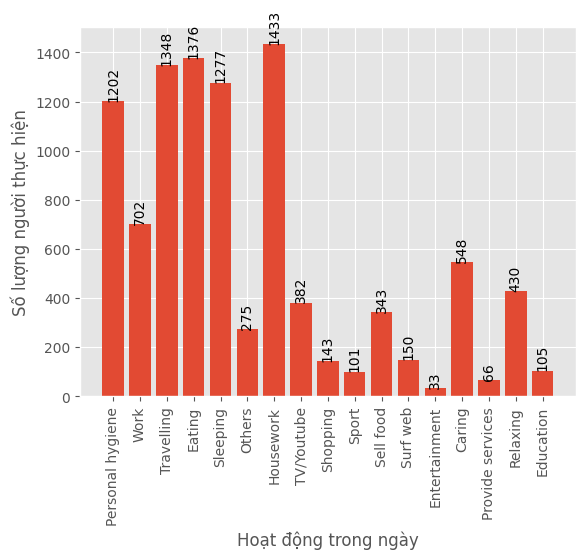

In [26]:
counts = []
for activity in activities:
    counts.append(cat_df[cat_df["Main active"] == activity].shape[0])
for i in range(len(counts)):
    counts[i] /= 12
counts = [round(counts) for counts in counts]
for i, value in enumerate(counts):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom',rotation=90 )

plt.bar(activities, counts)
plt.xlabel("Hoạt động trong ngày")
plt.xticks(rotation=90)
plt.ylabel("Số lượng người thực hiện")
plt.show()

In [27]:
toomuchSeries = cat_df.copy()
toomuchSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118933 entries, 0 to 118932
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   age              118933 non-null  object
 1   job_dsecription  118933 non-null  object
 2   Main active      118933 non-null  object
 3   age_groups       118933 non-null  object
 4   Province         117516 non-null  object
 5   Urban_Rural_GR   118933 non-null  object
 6   sex              118933 non-null  object
dtypes: object(7)
memory usage: 6.4+ MB


In [28]:
toomuchSeries = toomuchSeries.drop("job_dsecription", axis=1)
toomuchSeries = toomuchSeries.drop("Urban_Rural_GR", axis=1)
toomuchSeries = toomuchSeries.drop("sex", axis=1)
toomuchSeries = toomuchSeries.drop("age_groups", axis=1)

In [29]:
toomuchSeries = toomuchSeries.drop("Main active", axis=1)

Categorical variables view with bar charts:

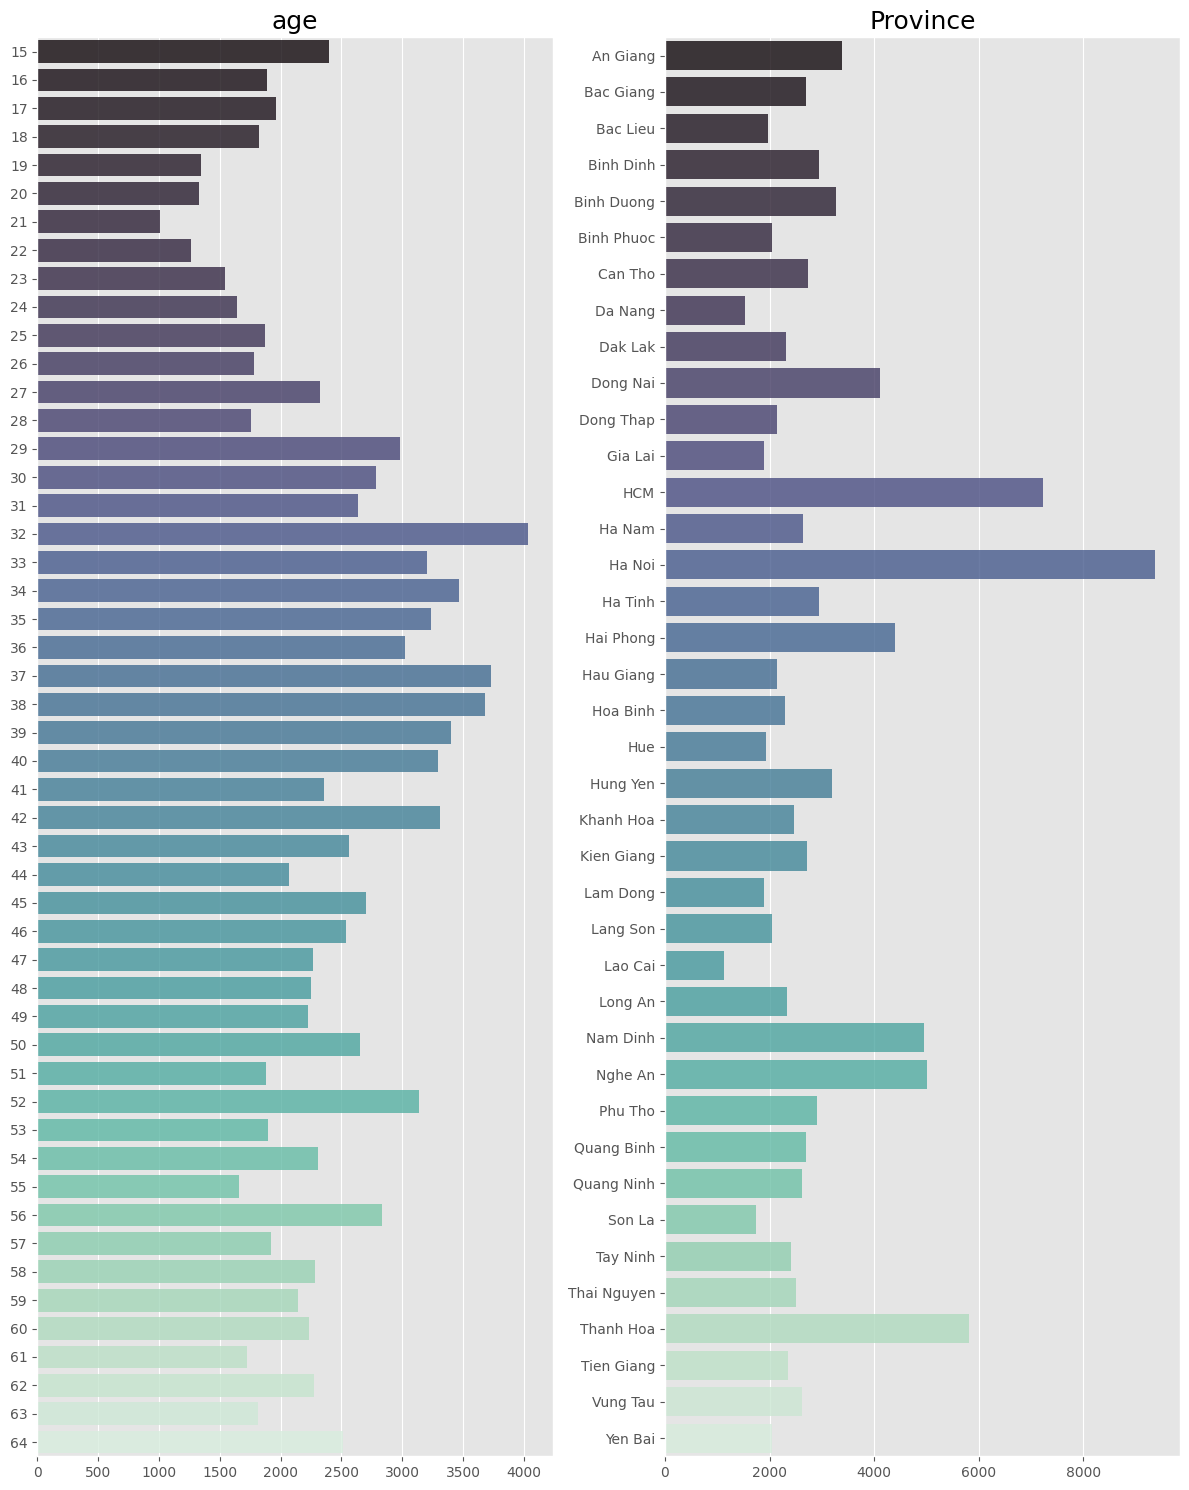

In [30]:
tmpunique_counts = toomuchSeries.nunique()

toomuchSeries = toomuchSeries.sort_index(level=[0, 1])# Sắp xếp theo cột tuổi rồi tỉnh thành
tmpnum_plot = len(toomuchSeries.columns) # number of plot
tmpnum_cols = min(tmpnum_plot, 2) # number of columns
tmpnum_rows = int(tmpnum_plot / tmpnum_cols) + (1 if tmpnum_plot % tmpnum_cols != 0 else 0)

tmpfig, tmpaxes = plt.subplots(tmpnum_rows, tmpnum_cols, figsize=(12, 15))

if isinstance(tmpaxes, np.ndarray):
  tmplist_axes = list(tmpaxes.flat)
else:
  tmplist_axes = [tmpaxes]

for index, col in enumerate(toomuchSeries.columns):
  tmpdf_count = df[col].value_counts().sort_index() # Sắp xếp từng cột con trước khi vẽ
  if (tmpdf_count.index.dtype == np.int64):
    tmpdf_count.index = map(str, tmpdf_count.index)

# set size title, x and y
  sns.barplot(ax = tmplist_axes[index] , x = tmpdf_count.values, y = tmpdf_count.index , alpha=0.8, palette='mako')
  tmplist_axes[index].set_title(col, fontsize=18)
  tmplist_axes[index].tick_params(axis="x", labelsize=10)
  tmplist_axes[index].tick_params(axis="y", labelsize=10)

for i in range(tmpnum_plot, len(tmplist_axes)):
  tmplist_axes[i].set_visible(False)

tmpfig.tight_layout()
plt.show()

In [31]:
cat_df = cat_df.drop("job_dsecription", axis=1)
cat_df = cat_df.drop("Province", axis=1)
cat_df = cat_df.drop("Main active", axis=1)
cat_df = cat_df.drop("age", axis=1)

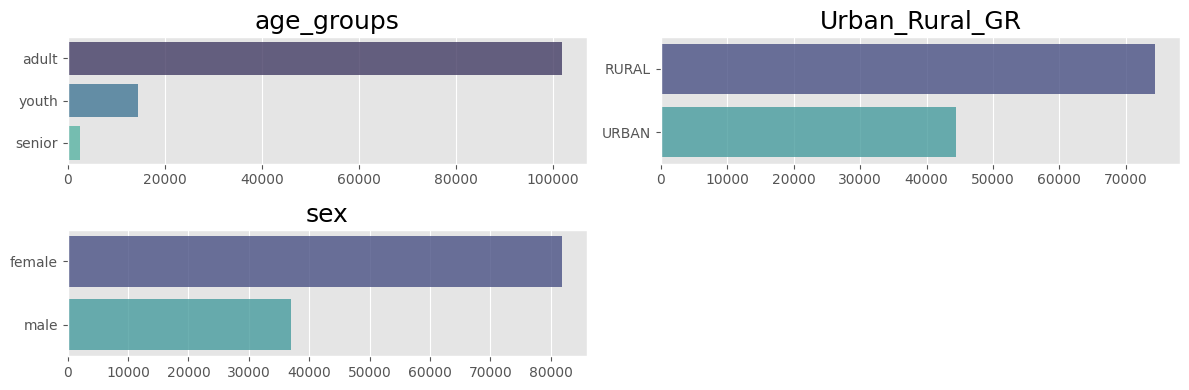

In [32]:
unique_counts = cat_df.nunique()
num_plot = len(cat_df.columns) # number of plot
num_cols = min(num_plot, 2) # number of columns
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=multifigs_size)

if isinstance(axes, np.ndarray):
  list_axes = list(axes.flat)
else:
  list_axes = [axes]

for index, col in enumerate(cat_df.columns):
  df_count = df[col].value_counts()
  if (df_count.index.dtype == np.int64):
    df_count.index = map(str, df_count.index)
# set size title, x and y
  sns.barplot(ax = list_axes[index] , x = df_count.values, y = df_count.index , alpha=0.8, palette='mako')
  list_axes[index].set_title(col, fontsize=18)
  list_axes[index].tick_params(axis="x", labelsize=10)
  list_axes[index].tick_params(axis="y", labelsize=10)

for i in range(num_plot, len(list_axes)):
  list_axes[i].set_visible(False)

fig.tight_layout()
plt.show()

Frequency of categorical variables:

In [33]:
fre_df = df.select_dtypes(include="object").copy()
fre_df = fre_df.drop("MATINH", axis=1)
fre_df = fre_df.drop("Province", axis=1)
fre_df = fre_df.drop("Urban_Rural", axis=1)
fre_df = fre_df.drop("job_dsecription", axis=1)
fre_df.head(2)

,age,Main active,age_groups,Urban_Rural_GR,sex
0,28,Personal hygiene,adult,URBAN,female
1,28,Work,adult,URBAN,female


In [34]:
for col in fre_df.columns:
  temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
  temp_df["frequency"] = round(temp_df["counts"]/len(df) * 100, 2)
  print(temp_df)

    age  counts  frequency
0    32    4035       3.39
1    37    3730       3.14
2    38    3685       3.10
3    34    3464       2.91
4    39    3400       2.86
5    42    3312       2.78
6    40    3294       2.77
7    35    3237       2.72
8    33    3204       2.69
9    52    3141       2.64
10   36    3025       2.54
11   29    2980       2.51
12   56    2830       2.38
13   30    2783       2.34
14   45    2700       2.27
15   50    2655       2.23
16   31    2638       2.22
17   43    2566       2.16
18   46    2540       2.14
19   64    2509       2.11
20   15    2397       2.02
21   41    2353       1.98
22   27    2320       1.95
23   54    2310       1.94
24   58    2279       1.92
25   62    2278       1.92
26   47    2264       1.90
27   48    2251       1.89
28   60    2230       1.88
29   49    2226       1.87
30   59    2143       1.80
31   44    2068       1.74
32   17    1966       1.65
33   57    1921       1.62
34   53    1893       1.59
35   16    1884       1.58
3

**Observation:**


*   More time is spent on the main activities of the day, which are `housework, eating, sleeping, moving around and personal hygiene`.

*   The majority of interview subjects are `adults`.

*   Interviewed a lot of people in `big cities` and `delta provinces` and less in `mountainous areas`

*   Most of the people being interviewed are female with almost `70 %`





Regarding age, from the figure below, the number of `senior` and `youth` people from the fig below is the lowest, but their `total time spent on activities` is nearly `as high as or even more than that of adults`.

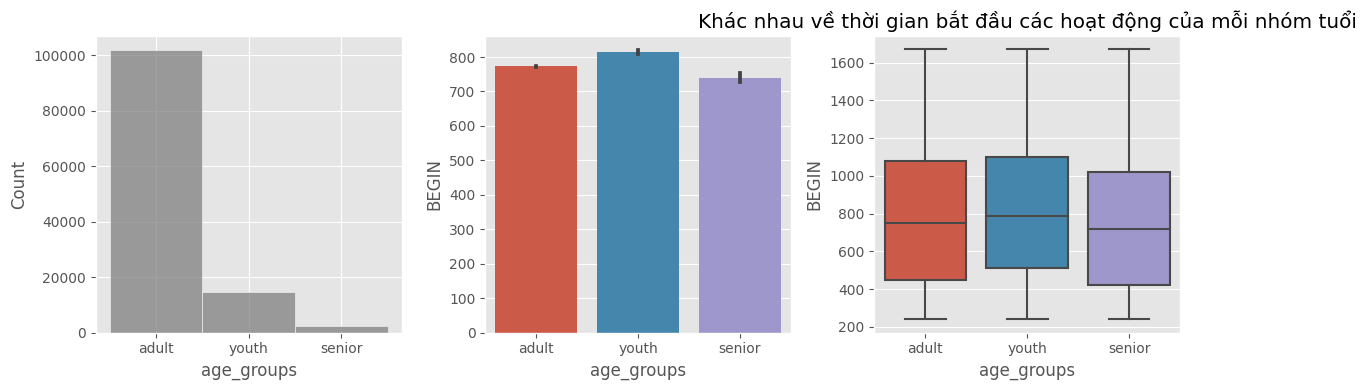

In [35]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
plt.title("Khác nhau về thời gian bắt đầu các hoạt động của mỗi nhóm tuổi" )
sns.histplot(x='age_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='age_groups', y='BEGIN', data=df, ax=axs[1])
sns.boxplot(x='age_groups', y='BEGIN', data=df, ax=axs[2])

plt.tight_layout()

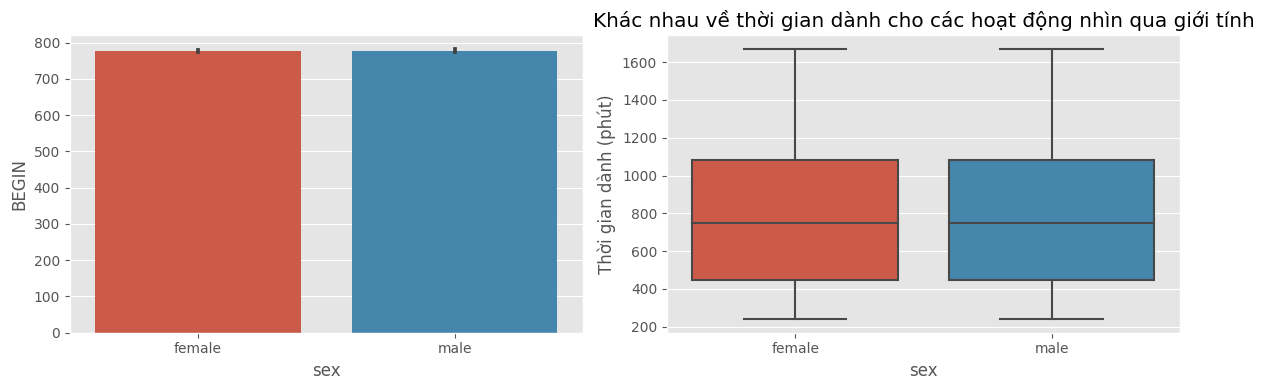

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
plt.title("Khác nhau về thời gian dành cho các hoạt động nhìn qua giới tính" )
sns.barplot(x='sex', y='BEGIN', data=df, ax=axs[0])
sns.boxplot(x='sex', y='BEGIN', data=df, ax=axs[1])
plt.ylabel('Thời gian dành (phút)')
plt.tight_layout()

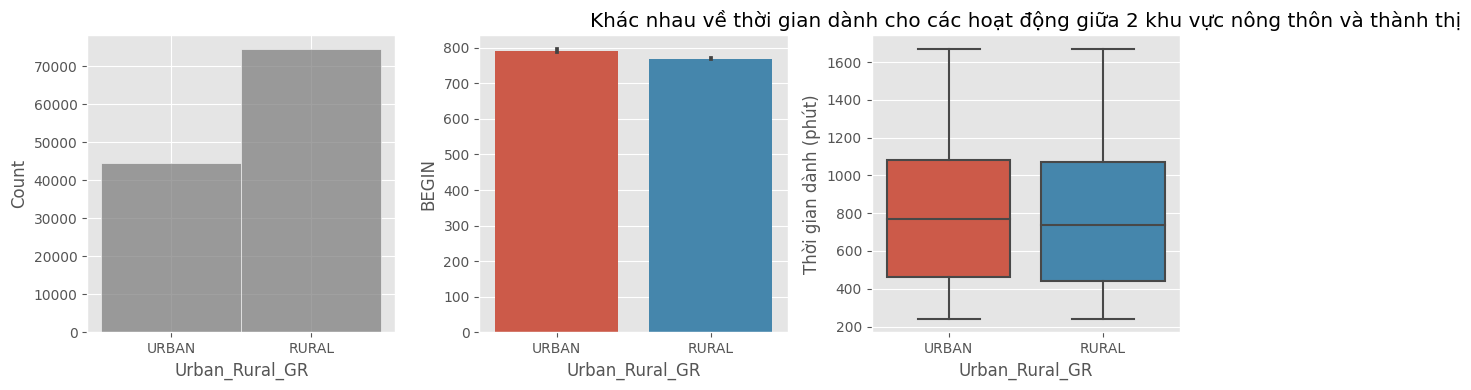

In [37]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
plt.title("Khác nhau về thời gian dành cho các hoạt động giữa 2 khu vực nông thôn và thành thị" )
sns.histplot(x='Urban_Rural_GR', data=df, ax=axs[0], color='grey')
sns.barplot(x='Urban_Rural_GR', y='BEGIN', data=df, ax=axs[1])
sns.boxplot(x='Urban_Rural_GR', y='BEGIN', data=df, ax=axs[2])
plt.ylabel('Thời gian dành (phút)')
plt.tight_layout()

# Data Visualization

### Total time spend on entertainment

In [38]:
data = df.copy()
leisure_activities = [
    "TV/Youtube",  # TV/Youtube
    "Surf web",  # Surf web
    "Eating",
    "Entertainment",
    "Relaxing"
]

In [39]:
activities_df = df[df["Main active"].isin(leisure_activities)]
activities_df.head(10)

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,END,Duration,Q401,Main active,age_groups,Province,Urban_Rural_GR,sex
3,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,7,710,750,40,1502,Eating,adult,Ha Noi,URBAN,female
12,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,14,1110,1140,30,1502,Eating,adult,Ha Noi,URBAN,female
14,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,16,1160,1260,100,1402,TV/Youtube,adult,Ha Noi,URBAN,female
18,10010000600801,1,1,1,28,2,NHÂN VIÊN BÁN HÀNG,1,3,320,340,20,1502,Eating,adult,Ha Noi,URBAN,female
25,10010000600803,2,1,1,48,2,NHÂN VIÊN VAN PHÒNG,1,6,390,420,30,1502,Eating,adult,Ha Noi,URBAN,female
27,10010000600803,2,1,1,48,2,NHÂN VIÊN VAN PHÒNG,1,18,1100,1140,40,1502,Eating,adult,Ha Noi,URBAN,female
29,10010000600803,2,1,1,48,2,NHÂN VIÊN VAN PHÒNG,1,11,710,760,50,1502,Eating,adult,Ha Noi,URBAN,female
33,10010000600803,2,1,1,48,2,NHÂN VIÊN VAN PHÒNG,1,21,1200,1320,120,1402,TV/Youtube,adult,Ha Noi,URBAN,female
42,10010000600814,1,1,1,29,2,LAO D___NG T___ DO,5,4,420,440,20,1502,Eating,adult,Ha Noi,URBAN,female
44,10010000600814,1,1,1,29,2,LAO D___NG T___ DO,5,11,1100,1140,40,1502,Eating,adult,Ha Noi,URBAN,female


## Correlation Martrix

In [40]:
from sklearn.preprocessing import LabelEncoder

df_transform = activities_df.copy()
df_transform = df_transform.drop("ID", axis=1)
df_transform = df_transform.drop("pid", axis=1)

In [41]:
def convert_to_period(time_in_minutes):
  result = time_in_minutes / 60
  if result < 11.5:
    return "Morning"
  elif result < 13.5:
    return "Noon"
  elif result < 17:
    return "Afternoon"
  else:
    return "Evening"

In [42]:
df_transform['section'] = df_transform['BEGIN'].apply(convert_to_period)
df_transform['age'] = pd.to_numeric(df_transform["age"])
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 3 to 118931
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MATINH           28448 non-null  object
 1   Urban_Rural      28448 non-null  object
 2   age              28448 non-null  int64 
 3   gender           28448 non-null  int64 
 4   job_dsecription  28448 non-null  object
 5   job_group        28448 non-null  int64 
 6   SEQ              28448 non-null  int64 
 7   BEGIN            28448 non-null  int64 
 8   END              28448 non-null  int64 
 9   Duration         28448 non-null  int64 
 10  Q401             28448 non-null  int64 
 11  Main active      28448 non-null  object
 12  age_groups       28448 non-null  object
 13  Province         28101 non-null  object
 14  Urban_Rural_GR   28448 non-null  object
 15  sex              28448 non-null  object
 16  section          28448 non-null  object
dtypes: int64(8), object(9)
memory 

The variables most correlated with the BEGIN are SEQ, END. We'll visualize them on the same figures.

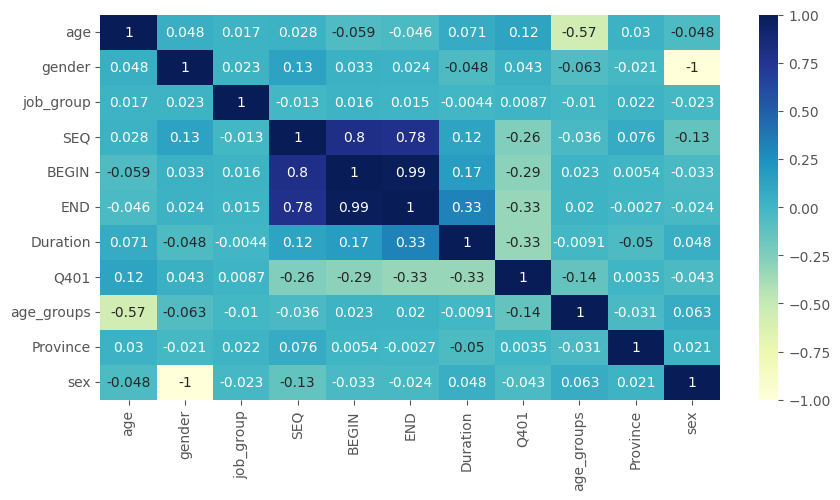

In [43]:
label = LabelEncoder()
label.fit(activities_df.sex.drop_duplicates())
df_transform.sex = label.transform(activities_df.sex)
label.fit(activities_df.age_groups.drop_duplicates())
df_transform.age_groups = label.transform(activities_df.age_groups)
label.fit(activities_df.Province.drop_duplicates())
df_transform.Province = label.transform(activities_df.Province)

fig, ax = plt.subplots(figsize=(10, 5))
corr_matrix = df_transform.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', ax=ax)
plt.show()

Let's analyze the END cost by age, bmi and children according to the section factor

Evening      12133
Morning       9178
Noon          5022
Afternoon     2115
Name: section, dtype: int64


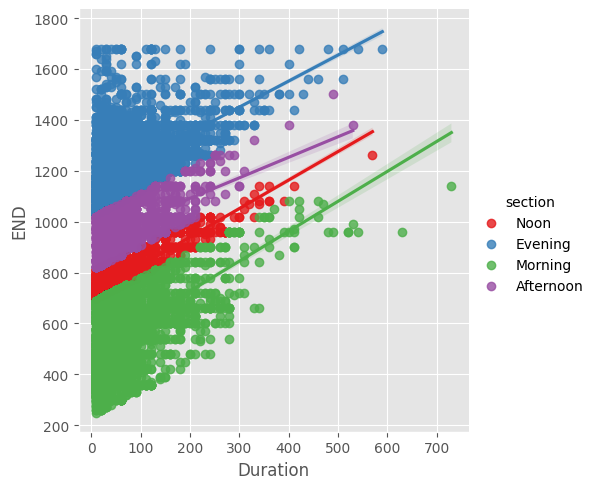

In [44]:
sns.lmplot(x='Duration', y='END', data=df_transform, hue='section', palette='Set1')
section_counts = df_transform['section'].value_counts()
print(section_counts)

### Variable `sex`, `age_groups`, `Urbanity` to each other

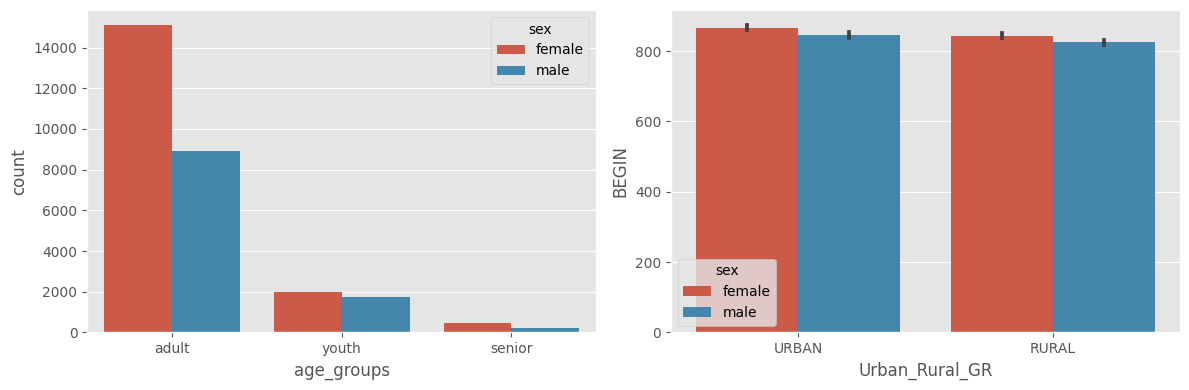

In [45]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.countplot(x='age_groups', hue='sex', data=activities_df, ax=axs[0])
sns.barplot(x='Urban_Rural_GR', y='BEGIN', hue='sex', data=activities_df, ax=axs[1])
plt.tight_layout()

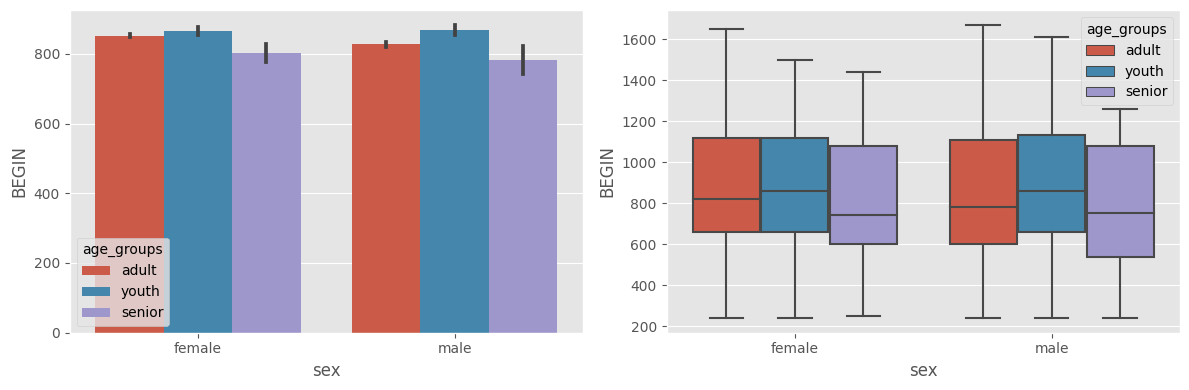

In [46]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.barplot(x='sex', y='BEGIN', hue='age_groups', data=activities_df, ax=axs[0])
sns.boxplot(x='sex', y='BEGIN', hue='age_groups', data=activities_df, ax=axs[1])
plt.tight_layout()

Observation:


**Fig 1:**
*   `axe 1`: About age groups, the most of interviewed are adults, which is superior to the two groups of old people and young people.
*   `axe 2`: The start time of an activity in urban areas is often about 30 minutes later than in rural areas.

=> fig 1: In general, in terms of gender, there are more women than men in both urban and rural areas


**Fig 2:**
*   `axe 1`: Adults stay up later than the other two groups.
*   `axe 2`: Leading to waking up later than the other 2 groups, the seniors wake up soonest.
=> fig2: In general adult stay up late than other groups, entertainment activity tend to start at 9:30 AM, end at 7:20 PM

